In [1]:
# importing librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
# import dataset
df=pd.read_csv("data.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [3]:
df.dtypes

Age                     int64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

# Data Preprocessing and Exploration

In [5]:
# replace invalid value with nan and then with mode or mean/median as per data dypes
df['Interest']=df['Interest'].replace('Unknown',np.nan)
df['Interest']=df['Interest'].fillna(df['Interest'].mode()[0],axis=0)

In [6]:
# Feature engineering: Create new features
continuous_cols=[]
for i in df.columns:
    data_typ=df[i].dtypes
    
    if data_typ in ['float64','int64']:
        continuous_cols.append(i)
        
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40], labels=['<20', '20-30', '30-40'])
df['Score_Sum'] = df[continuous_cols].sum(axis=1)

print("Feature Engineering: Added 'Age_Group' and 'Score_Sum'.")

Feature Engineering: Added 'Age_Group' and 'Score_Sum'.


In [7]:
df.dtypes

Age                      int64
Gender                  object
Education                int64
Introversion Score     float64
Sensing Score          float64
Thinking Score         float64
Judging Score          float64
Interest                object
Personality             object
Age_Group             category
Score_Sum              float64
dtype: object

In [8]:
df['Age_Group'] = df['Age_Group'].astype('object')
df.dtypes

Age                     int64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
Age_Group              object
Score_Sum             float64
dtype: object

In [9]:
# Encode categorical variables
for i in df.columns:
    data_typ=df[i].dtypes
    
    if data_typ=='object':
        encoder=LabelEncoder()
        df[i]=encoder.fit_transform(df[i])
    

In [10]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,Age_Group,Score_Sum
0,19,1,0,9.47080,7.141434,6.03696,4.360278,0,1,2,46.009472
1,27,0,0,5.85392,6.160195,0.80552,4.221421,2,5,0,44.041056
2,21,0,0,7.08615,3.388433,2.66188,5.127320,0,1,0,39.263783
3,28,1,0,2.01892,4.823624,7.30625,5.986550,1,11,0,48.135345
4,36,0,1,9.91703,4.755080,5.31469,4.677213,3,1,1,61.664013


In [11]:
# Normalize continuous variables
for i in df.columns:
    data_typ=df[i].dtypes
    
    if data_typ in ['float64','int64']:
        scaler = StandardScaler()
        df[[i]] = scaler.fit_transform(df[[i]])

In [12]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,Age_Group,Score_Sum
0,-1.497369,1,-0.835609,1.548977,1.740607,0.363450,-0.156667,0,1,2,-0.059348
1,0.132622,0,-0.835609,0.296866,0.911320,-1.449241,-0.256451,2,5,0,-0.354810
2,-1.089871,0,-0.835609,0.723446,-1.431215,-0.806013,0.394536,0,1,0,-1.071886
3,0.336371,1,-0.835609,-1.030756,-0.218274,0.803258,1.011987,1,11,0,0.259748
4,1.966361,0,1.196733,1.703455,-0.276203,0.113184,0.071085,3,1,1,2.290421


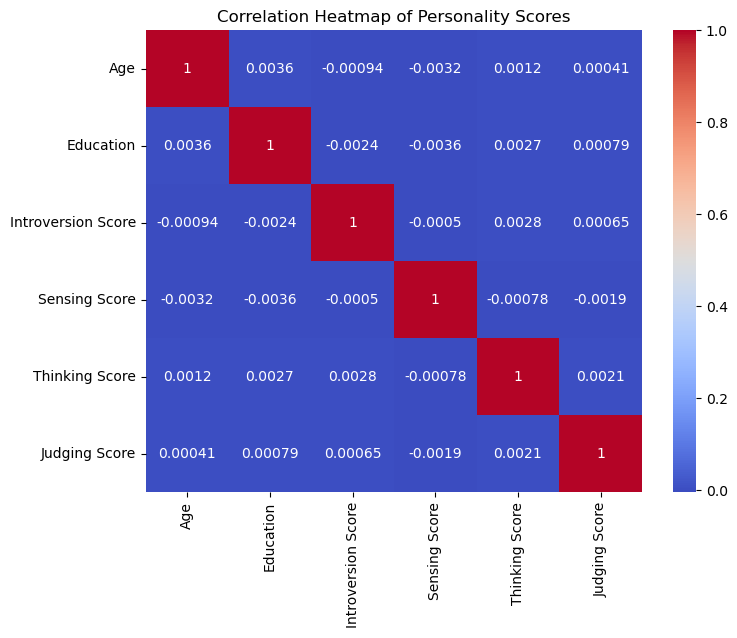

In [13]:
# Visualize distributions
plt.figure(figsize=(8, 6))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Personality Scores')
plt.show()

<Figure size 1000x600 with 0 Axes>

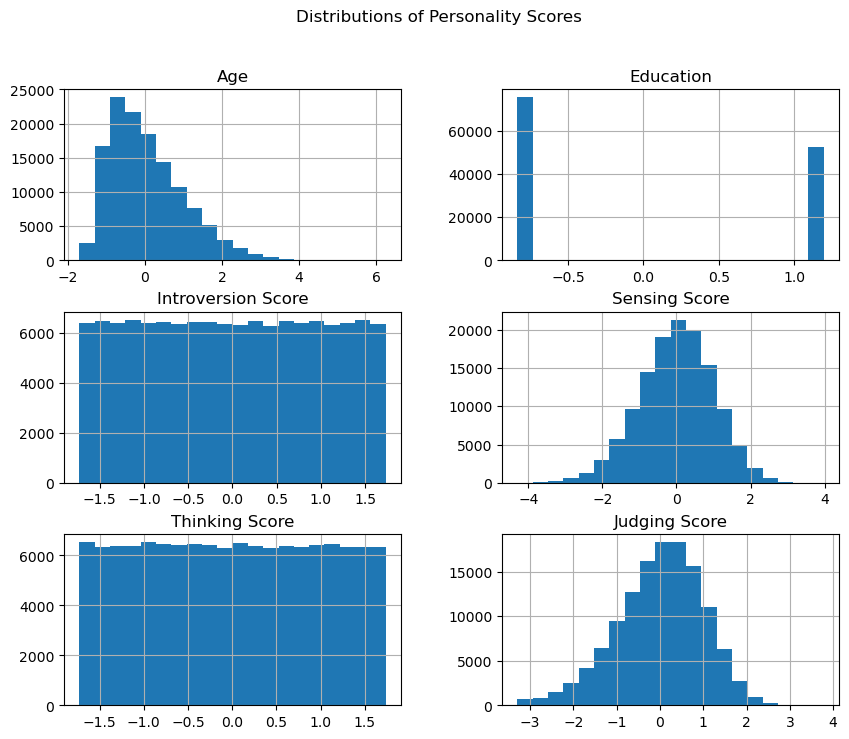

In [14]:
# Visualize distributions
plt.figure(figsize=(10, 6))
df[continuous_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions of Personality Scores')
plt.show()

In [15]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,Age_Group,Score_Sum
0,-1.497369,1,-0.835609,1.548977,1.740607,0.363450,-0.156667,0,1,2,-0.059348
1,0.132622,0,-0.835609,0.296866,0.911320,-1.449241,-0.256451,2,5,0,-0.354810
2,-1.089871,0,-0.835609,0.723446,-1.431215,-0.806013,0.394536,0,1,0,-1.071886
3,0.336371,1,-0.835609,-1.030756,-0.218274,0.803258,1.011987,1,11,0,0.259748
4,1.966361,0,1.196733,1.703455,-0.276203,0.113184,0.071085,3,1,1,2.290421


# Model Building and Evaluation

In [17]:
# Split the data
X = df.drop(columns=['Personality'])
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)}

In [38]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train) # training the model in each iteration
    y_pred = model.predict(X_test) # predicting for each model
    accuracy = accuracy_score(y_test, y_pred) * 100  # checking the accuracy and f1 score for each model and store it in results
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}
    print(f"{name}:\nAccuracy: {accuracy}, F1 Score: {f1}\n")

Decision Tree:
Accuracy: 85.15987974856517, F1 Score: 85.16118352142654

Random Forest:
Accuracy: 88.0607504001874, F1 Score: 88.02230244068426

SVM:
Accuracy: 86.08128684652326, F1 Score: 85.98158219883398



In [46]:
# Confusion matrix for the best model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = models[best_model_name]
best_model

RandomForestClassifier(random_state=42)

In [50]:
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
conf_matrix

array([[ 703,   27,   10,    0,    9,    0,    0,    0,   44,    6,    0,
           0,    0,    0,    0,    0],
       [   0, 6480,    0,   27,    0,   78,    0,    0,    0,  368,    0,
           3,    0,    7,    0,    0],
       [  15,    0,  456,   18,    0,    0,    7,    2,    3,    0,   25,
           2,    0,    0,    3,    0],
       [   0,  213,    0, 4402,    0,    4,    0,   58,    0,   10,    0,
         297,    0,    0,    0,    5],
       [  10,    2,    0,    0,   76,   10,    1,    0,    1,    0,    0,
           0,    1,    0,    0,    0],
       [   0,   86,    0,    1,    0,  814,    0,    8,    0,   10,    0,
           0,    0,   60,    0,    2],
       [   0,    0,   11,    0,    0,    0,   56,    8,    0,    0,    1,
           0,    0,    0,    2,    0],
       [   0,    3,    0,   70,    0,   27,    0,  487,    0,    0,    0,
           7,    0,    3,    0,   36],
       [  38,    4,    0,    0,    1,    1,    0,    0,  533,   29,    2,
           0,    3,   

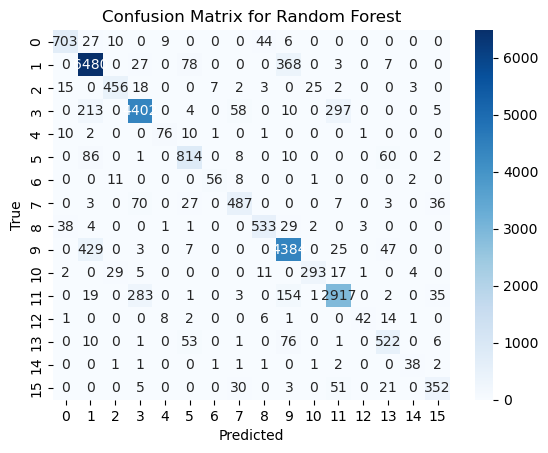

In [52]:
# check the relationshiop using heatmeap btw teue and predicted value
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [56]:
# Feature importances for Random Forest
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_*100
    feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    print(feature_importances_df)

              Feature  Importance
5      Thinking Score   27.531209
3  Introversion Score   26.506221
4       Sensing Score   11.818731
6       Judging Score   11.081879
9           Score_Sum    9.054829
0                 Age    4.610768
2           Education    4.045704
1              Gender    2.734159
7            Interest    2.038953
8           Age_Group    0.577546


In [60]:
# Insights and reporting
print("Insights:")
print(f"Best Model: {best_model_name}")
print(f"Results: {results}")

Insights:
Best Model: Random Forest
Results: {'Decision Tree': {'Accuracy': 85.15987974856517, 'F1 Score': 85.16118352142654}, 'Random Forest': {'Accuracy': 88.0607504001874, 'F1 Score': 88.02230244068426}, 'SVM': {'Accuracy': 86.08128684652326, 'F1 Score': 85.98158219883398}}
